# DC Street network orientations

Adapted from a notebook by [Geoff Boeing](https://geoffboeing.com/)


  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import geopandas as gp

%matplotlib inline
ox.config(log_console=True)
weight_by_length = False


In [2]:
places = {
    "Adams Morgan" : "Adams Morgan, District of Columbia, USA",
    "Anacostia" : "Anacostia, District of Columbia, USA",
    "Barry Farm" : "Barry Farm, District of Columbia, USA",
    "Bloomingdale" : "Bloomingdale, District of Columbia, USA",
    "Brookland" : "brookland, District of Columbia, USA",
    "Capitol Hill" : "Capitol Hill, District of Columbia, USA",
    "Cleveland Park" : "Cleveland park, District of Columbia, USA",
    "Columbia Heights" : "Columbia Heights , District of Columbia, USA",
    "Congress Heights" : "Congress Heights, District of Columbia, USA",
    "Dupont Circle" : "Dupont Circle, District of Columbia, USA",
    "Eckington" : "Eckington, District of Columbia, USA",
    "Foggy Bottom" : "Foggy Bottom, District of Columbia, USA",
    "Fort Totten" : "Fort Totten, District of Columbia, USA",
    "Georgetown" : "Georgetown, District of Columbia, USA",
    "Navy Yard" : "Navy yard, District of Columbia, USA",
    "Shaw" : "Logan Circle/Shaw, District of Columbia, USA",    
}

In [3]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-77.04920 38.91976, -77.04893 38.919...",38.926428,38.914659,-77.036561,-77.049203,259045242,relation,4637409,38.921500,-77.042199,"Adams Morgan, Washington, District of Columbia...",place,neighbourhood,0.750000
1,"POLYGON ((-76.99364 38.86418, -76.99297 38.863...",38.868168,38.856932,-76.973504,-76.993635,259305663,relation,4647091,38.862581,-76.984441,"Anacostia, Washington, District of Columbia, U...",boundary,neighborhood,0.771565
2,"POLYGON ((-77.00273 38.86041, -77.00238 38.859...",38.862173,38.855070,-76.993770,-77.002726,258806589,relation,4647938,38.859804,-76.996971,"Barry Farm, Washington, District of Columbia, ...",place,neighbourhood,0.750000
3,"POLYGON ((-77.01485 38.92059, -77.01483 38.920...",38.926553,38.910925,-77.007257,-77.014850,259282895,relation,4636553,38.916778,-77.011365,"Bloomingdale, Washington, District of Columbia...",place,neighbourhood,0.660000
4,"POLYGON ((-76.99411 38.92478, -76.99406 38.924...",38.940728,38.922121,-76.971729,-76.994107,259049391,relation,4634087,38.932832,-76.984226,"Brookland, Washington, District of Columbia, U...",place,neighbourhood,0.730718
5,"POLYGON ((-77.00899 38.88499, -77.00896 38.883...",38.889745,38.878439,-76.986161,-77.008993,258315246,relation,4642488,38.889001,-77.000254,"Capitol Hill, Washington, District of Columbia...",place,neighbourhood,0.933871
6,"POLYGON ((-77.07635 38.94214, -77.07496 38.939...",38.942177,38.930103,-77.051514,-77.076349,259044828,relation,4631753,38.935231,-77.058707,"Cleveland Park, Washington, District of Columb...",place,neighbourhood,0.750000
7,"POLYGON ((-77.03641 38.91943, -77.03641 38.919...",38.937389,38.919223,-77.022160,-77.036411,259374652,relation,4637142,38.928185,-77.031923,"Columbia Heights, Washington, District of Colu...",boundary,neighborhood,0.833257
8,"POLYGON ((-77.00832 38.83314, -77.00830 38.832...",38.850045,38.831116,-76.982675,-77.008322,258941926,relation,4648208,38.842897,-77.000255,"Congress Heights, Washington, District of Colu...",place,neighbourhood,0.750000
9,"POLYGON ((-77.05120 38.91079, -77.05107 38.910...",38.919138,38.906177,-77.034633,-77.051199,258314562,relation,4638652,38.912423,-77.041251,"Dupont Circle, Washington, District of Columbi...",boundary,neighborhood,0.925742


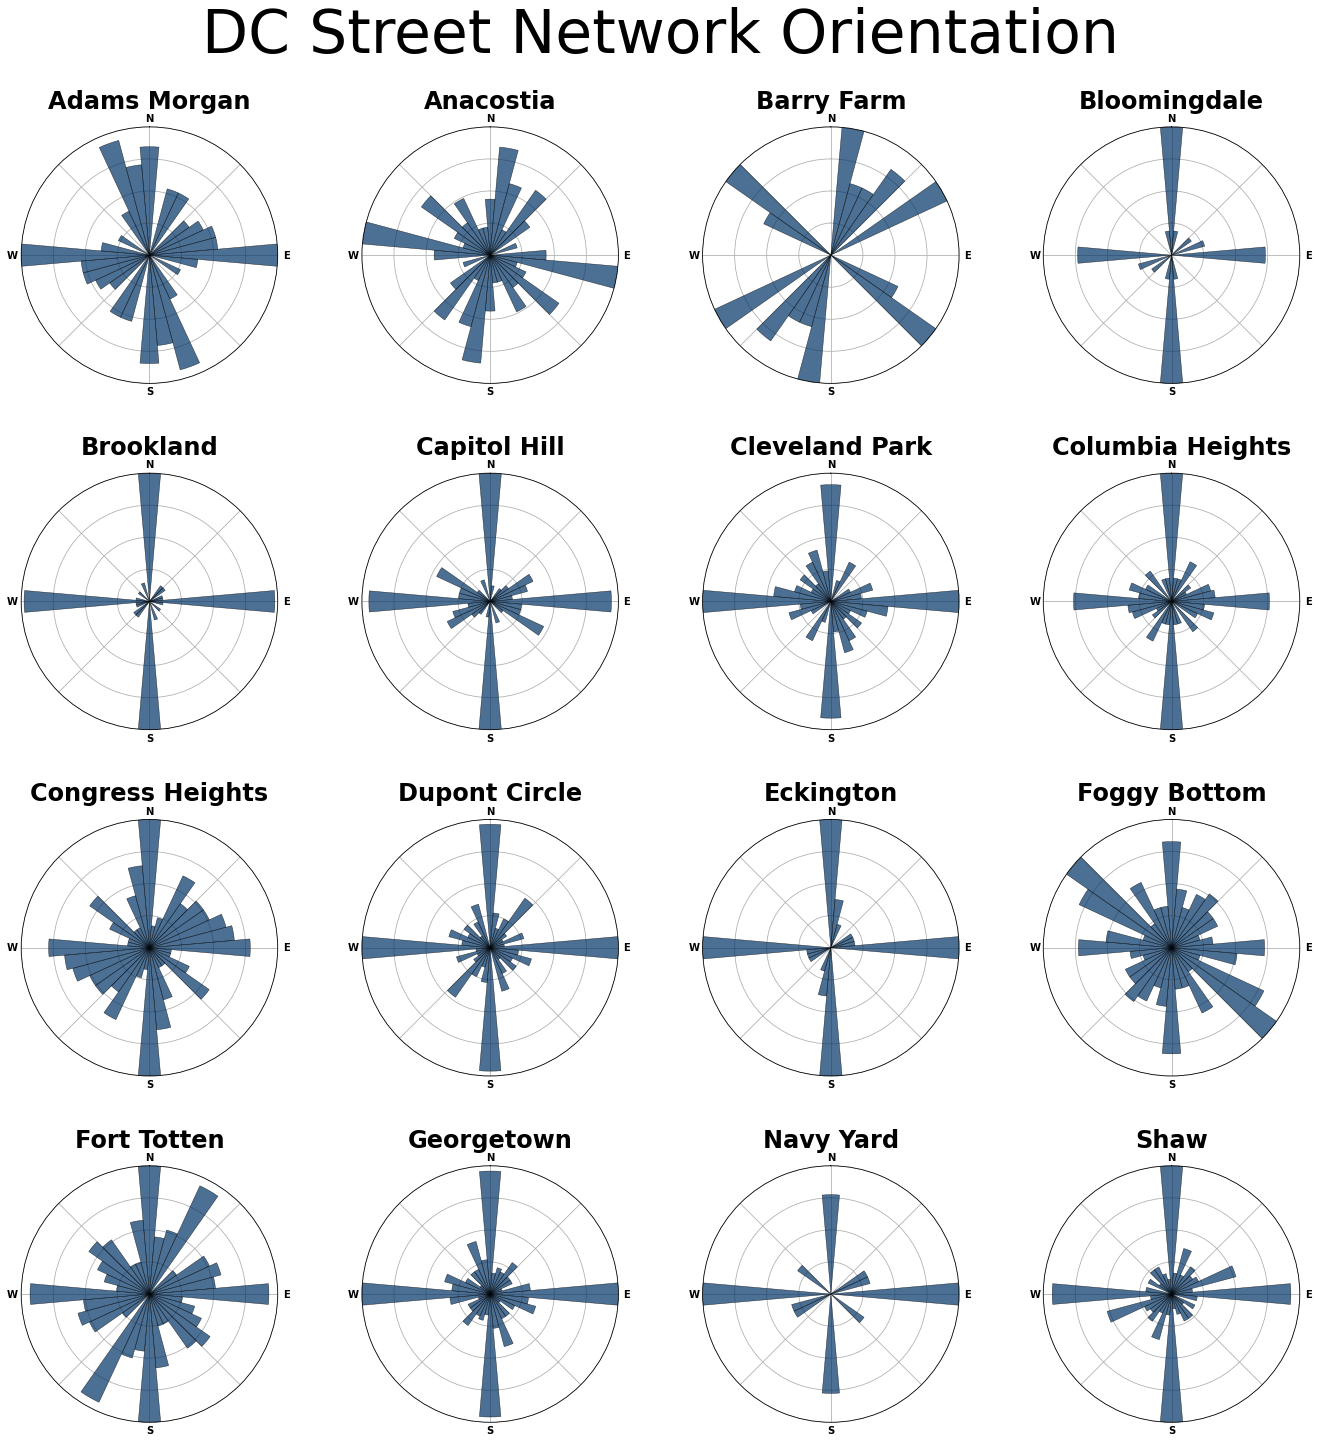

In [4]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each neighborhood's polar histogram
for ax, place in zip(axes.flat, places.keys()):

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(places[place], network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.bearing.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title 
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("DC Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)

# save the image
fig.savefig("images/street-orientations_hood.png", facecolor="w", dpi=300, bbox_inches="tight")

You can also calculate the orientation entropy of a spatial graph with the `ox.bearing.orientation_entropy` function.